## problem statement

## Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as sfa
from sklearn.preprocessing import StandardScaler

In [97]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [98]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [99]:
df.shape

(1436, 38)

### creating new dataframe with specified columns and renaming columns

In [100]:
df_new=df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]
df_new=df_new.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df_new

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


### Descriptive analysis

In [101]:
df_new.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


### checking for Data Types

In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1436 non-null   int64
 1   KM      1436 non-null   int64
 2   HP      1436 non-null   int64
 3   CC      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   QT      1436 non-null   int64
 7   Weight  1436 non-null   int64
 8   Price   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### checking for missing values

In [103]:
df_new.isnull().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

### checking for duplicated values

In [104]:
df_new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [105]:
df_new.duplicated().any()

True

In [106]:
df_new[df_new.duplicated()]

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [107]:
df_new=df_new.drop_duplicates()

In [108]:
df_new[df_new.duplicated()]

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price


### Let's find how many continuous and discrete variables are their

In [109]:
discrete_feature=[feature for feature in df_new.columns if len(df_new[feature].unique())>20 and feature]
print('there are total {} discrete features'.format(len(discrete_feature)))

there are total 4 discrete features


In [110]:
continuous_feature=[feature for feature in df_new.columns if df_new[feature].dtype!='O' and feature not in discrete_feature]
print('there are total {} continuous features'.format(len(continuous_feature)))

there are total 5 continuous features


### Exploaratory data analysis

In [111]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

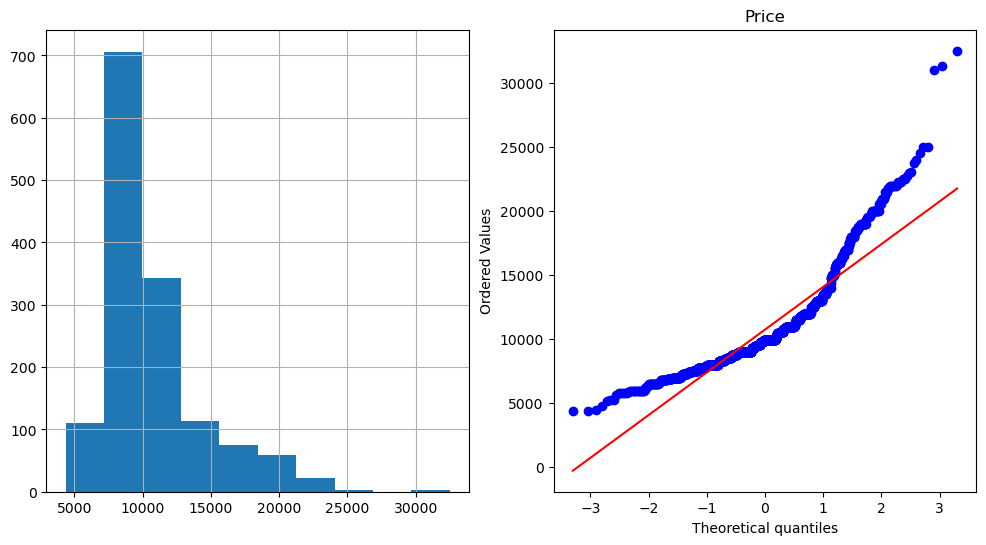

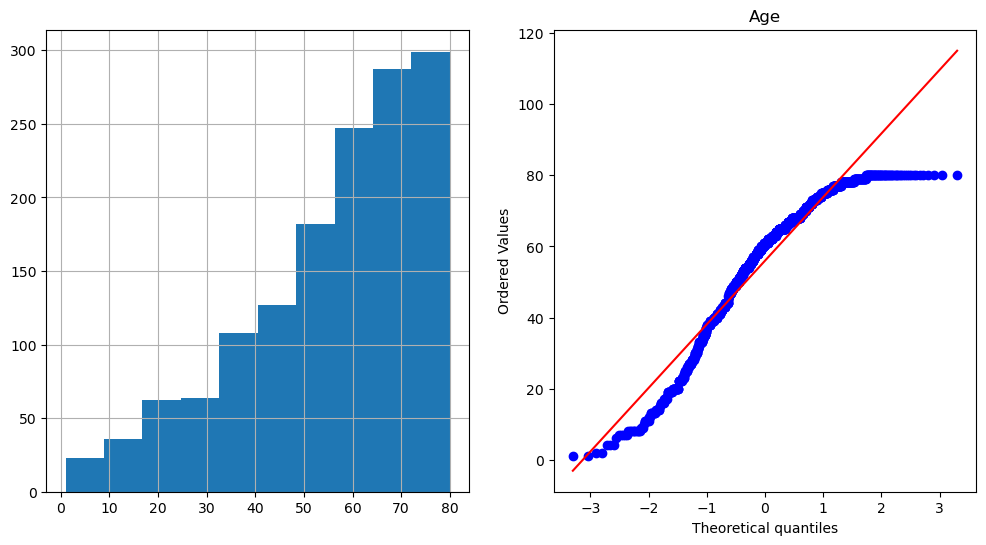

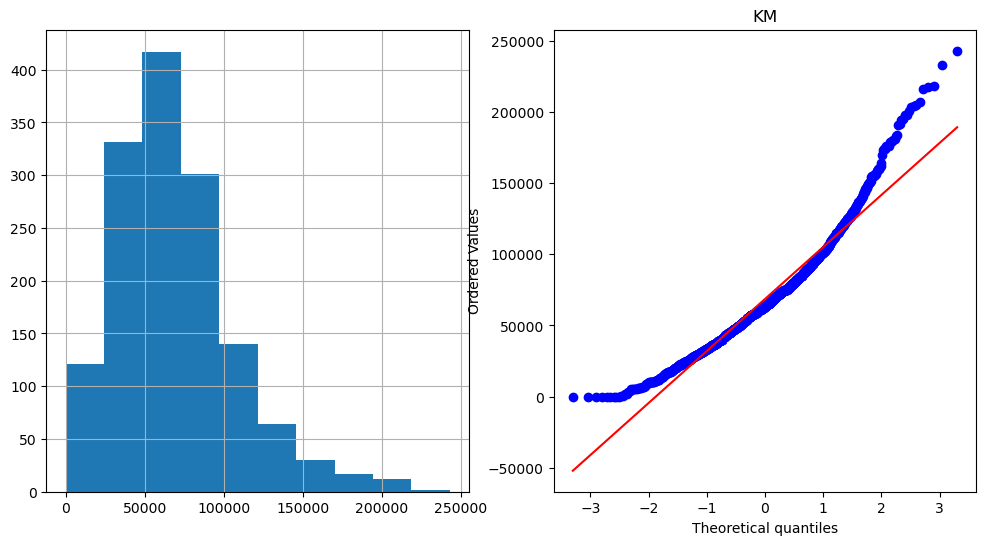

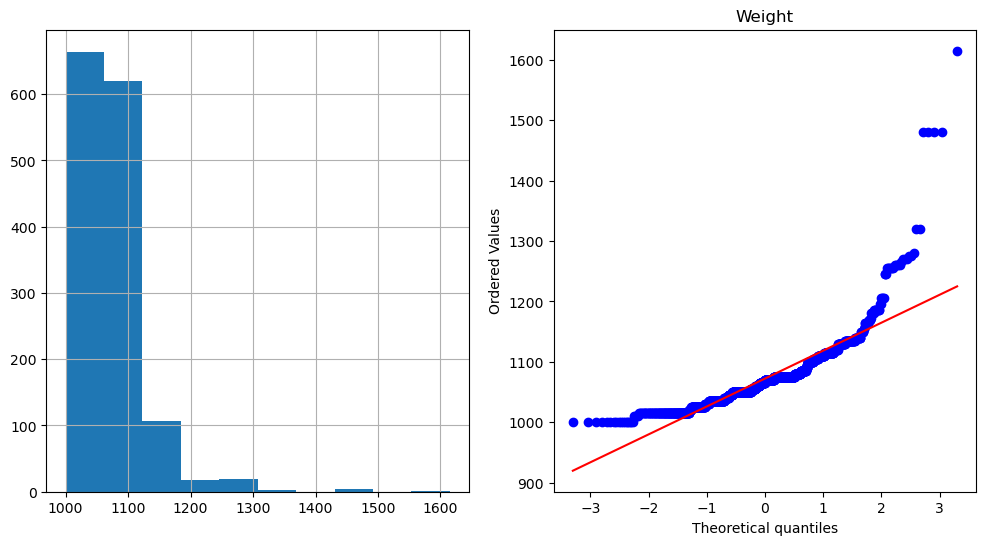

In [112]:
plot_data(df_new,'Price')
plt.title('Price')
plot_data(df_new,'Age')
plt.title('Age')
plot_data(df_new,'KM')
plt.title('KM')
plot_data(df_new,'Weight')
plt.title('Weight')

### visualizing the relation between each independent feature with respect to dependent feature

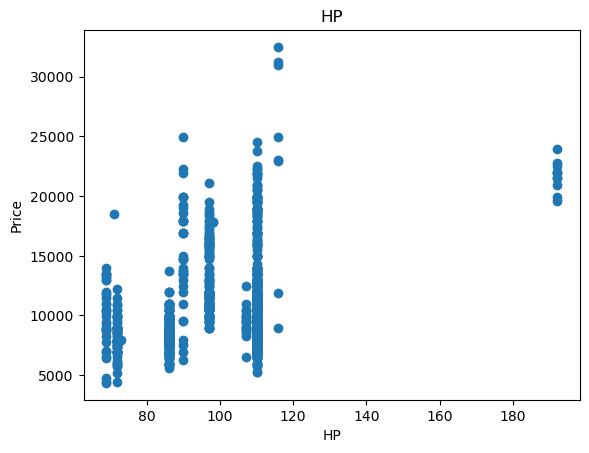

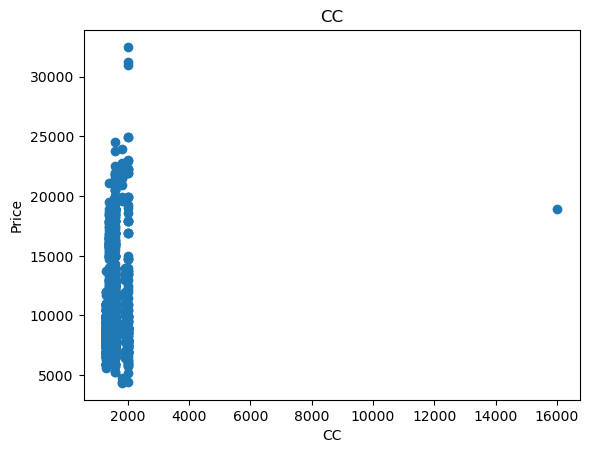

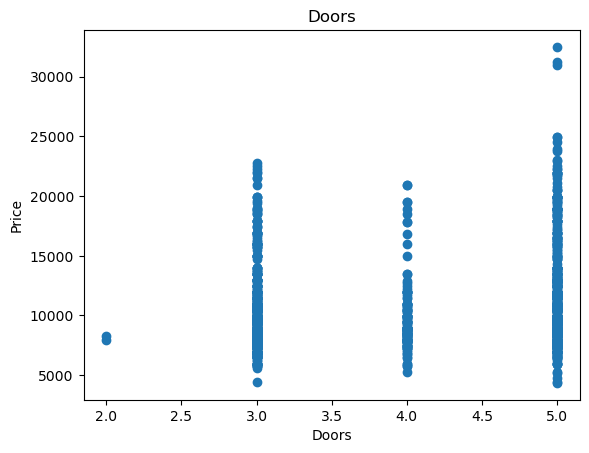

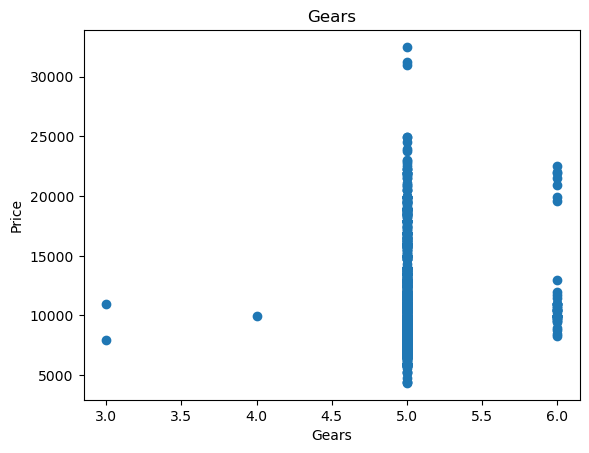

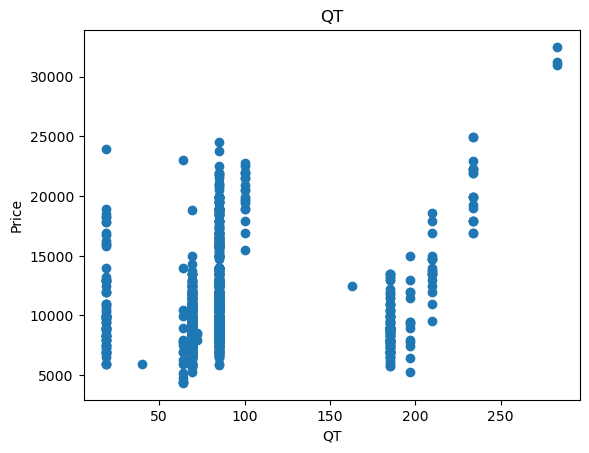

In [117]:
for feature in continuous_feature:
    if feature!='Price':
        dff=df_new.copy()
        plt.scatter(dff[feature],dff['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

### observation: there isn't much difference how much doors and gears each car has,to have a significant amount of changes in from each other there isn't any direct relation

### Data visualization of outliers in continuous datatype feature

<Axes: xlabel='Weight'>

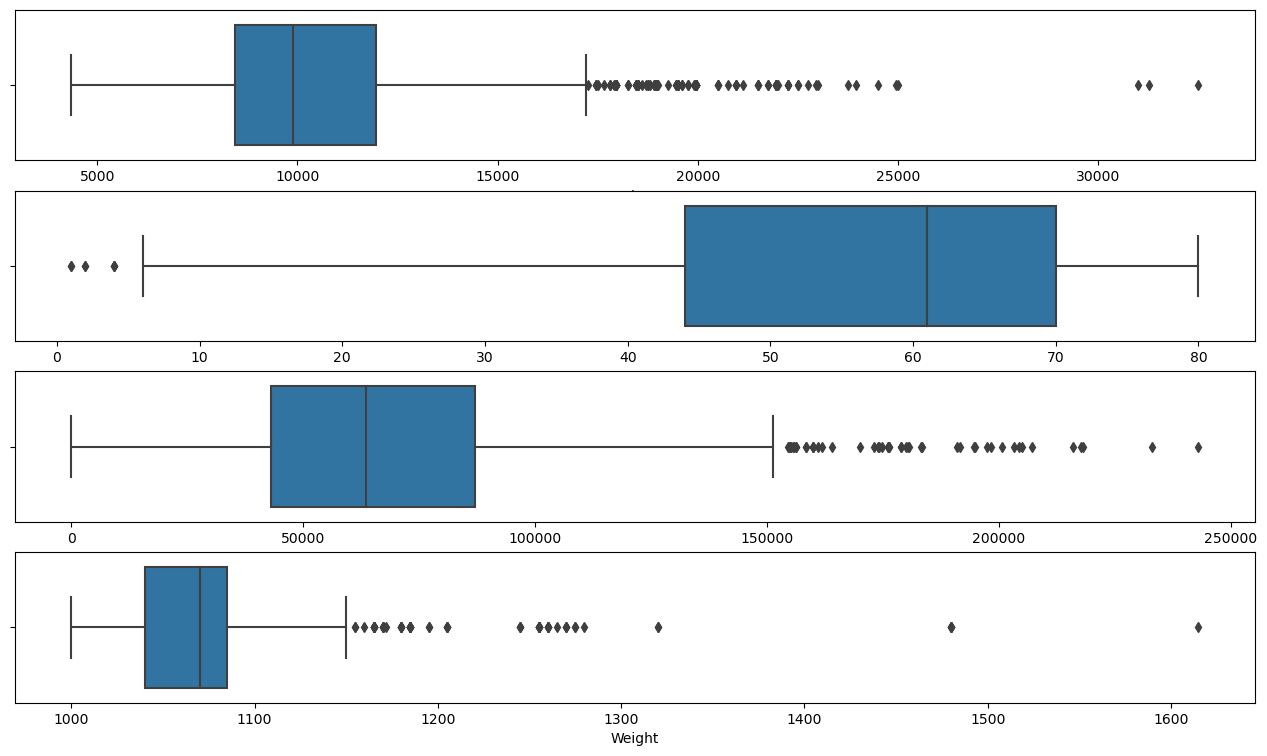

In [135]:
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df_new,ax=axes[0])
sns.boxplot(x='Age',data=df_new,ax=axes[1])
sns.boxplot(x='KM',data=df_new,ax=axes[2])
sns.boxplot(x='Weight',data=df_new,ax=axes[3])

### lets try median imputation to handle outlier

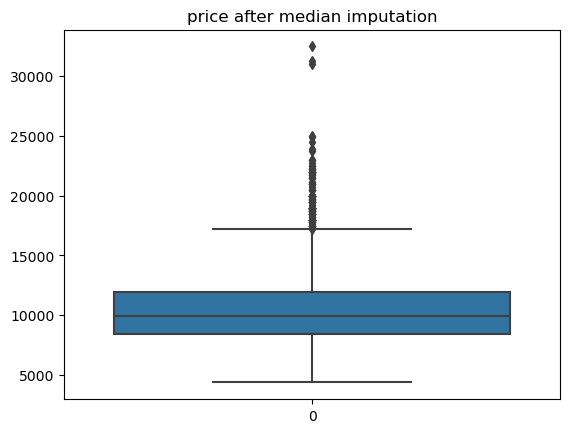

In [140]:
data=df_new.copy()
for i in data['Price']:
    q1=np.quantile(data.Price,0.25)
    q2=np.quantile(data.Price,0.50)
    q3=np.quantile(data.Price,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Price']=data['Price'].replace(i,np.median(data['Price']))
sns.boxplot(df['Price'])
plt.title('price after median imputation')
plt.show()

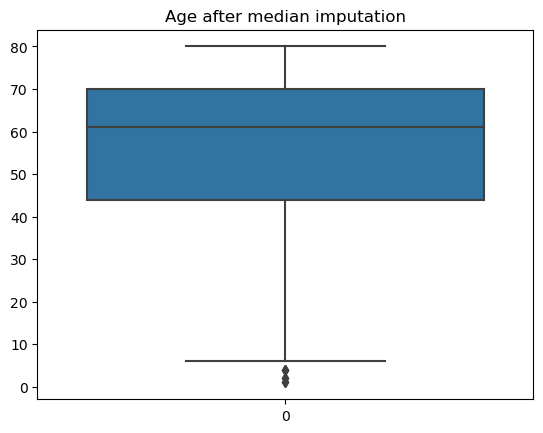

In [141]:
data=df_new.copy()
for i in data['Age']:
    q1=np.quantile(data.Age,0.25)
    q2=np.quantile(data.Age,0.50)
    q3=np.quantile(data.Age,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Age']=data['Age'].replace(i,np.median(data['Age']))
sns.boxplot(df['Age'])
plt.title('Age after median imputation')
plt.show()

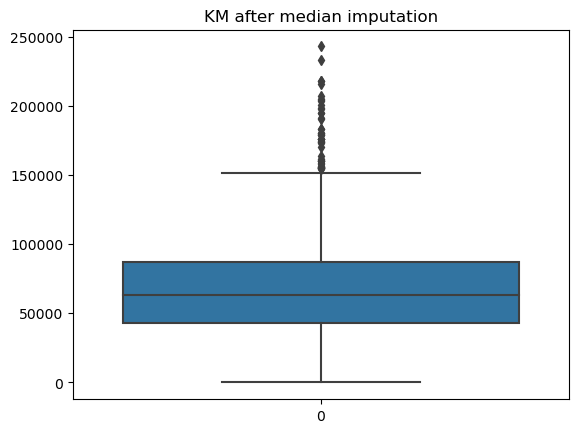

In [143]:
data=df_new.copy()
for i in data['KM']:
    q1=np.quantile(data.KM,0.25)
    q2=np.quantile(data.KM,0.50)
    q3=np.quantile(data.KM,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['KM']=data['KM'].replace(i,np.median(data['KM']))
sns.boxplot(df['KM'])
plt.title('KM after median imputation')
plt.show()

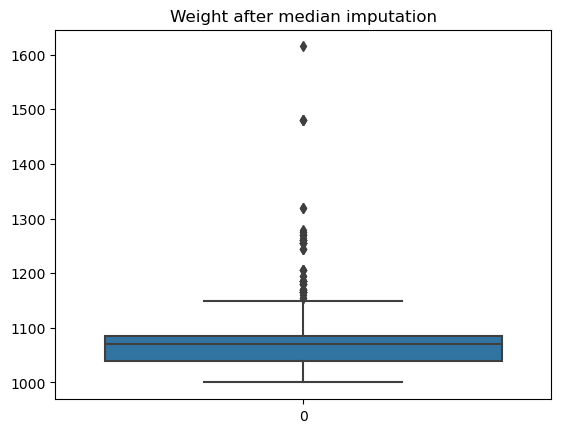

In [144]:
data=df_new.copy()
for i in data['Weight']:
    q1=np.quantile(data.Weight,0.25)
    q2=np.quantile(data.Weight,0.50)
    q3=np.quantile(data.Weight,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Weight']=data['Weight'].replace(i,np.median(data['Weight']))
sns.boxplot(df['Weight'])
plt.title('Weight after median imputation')
plt.show()

### let's test our data in model and find the Rsquared with median imputation data model

In [148]:
model=sfa.ols(formula='Price~Age+KM+Weight',data=data).fit()

In [149]:
# finding rsquared and adjusted rsquared values
model.rsquared,model.rsquared_adj

(0.8029582800666595, 0.8025451946999229)

### let's try mean imputation to handle outlier

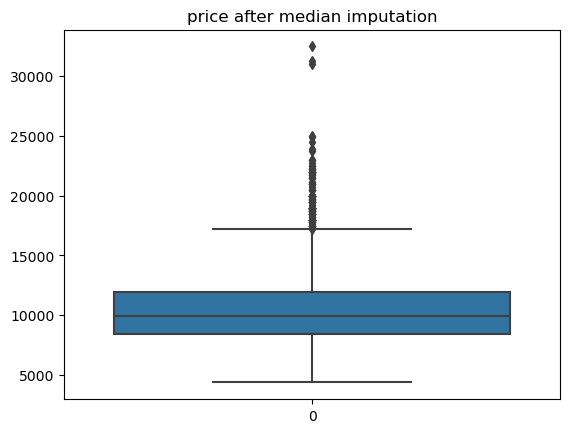

In [150]:
data=df_new.copy()
for i in data['Price']:
    q1=np.quantile(data.Price,0.25)
    q2=np.quantile(data.Price,0.50)
    q3=np.quantile(data.Price,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Price']=data['Price'].replace(i,np.mean(data['Price']))
sns.boxplot(df['Price'])
plt.title('price after median imputation')
plt.show()

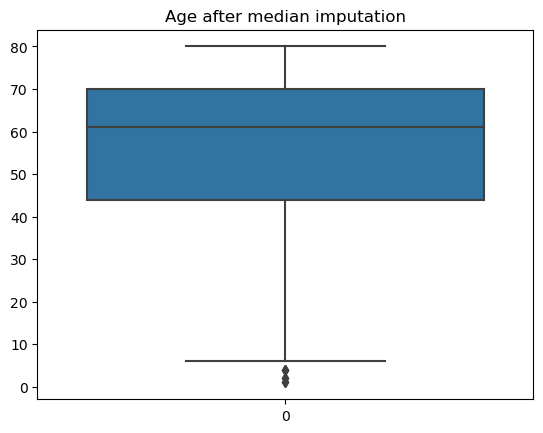

In [151]:
data=df_new.copy()
for i in data['Age']:
    q1=np.quantile(data.Age,0.25)
    q2=np.quantile(data.Age,0.50)
    q3=np.quantile(data.Age,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Age']=data['Age'].replace(i,np.mean(data['Age']))
sns.boxplot(df['Age'])
plt.title('Age after median imputation')
plt.show()

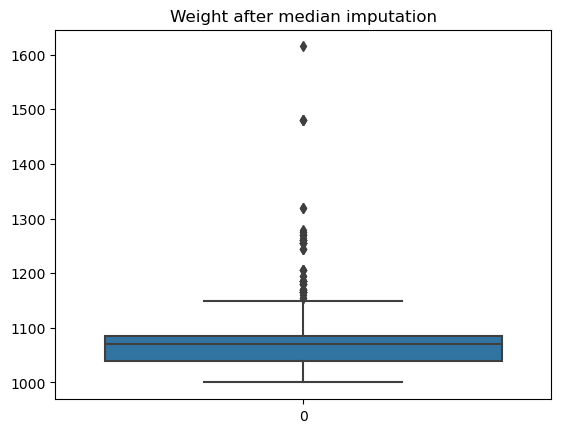

In [152]:
data=df_new.copy()
for i in data['Weight']:
    q1=np.quantile(data.Weight,0.25)
    q2=np.quantile(data.Weight,0.50)
    q3=np.quantile(data.Weight,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['Weight']=data['Weight'].replace(i,np.mean(data['Weight']))
sns.boxplot(df['Weight'])
plt.title('Weight after median imputation')
plt.show()

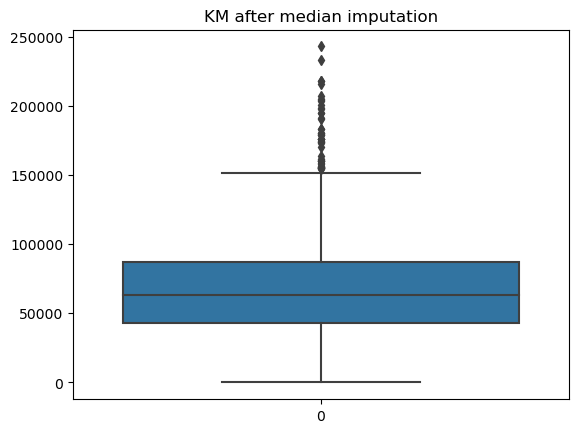

In [153]:
data=df_new.copy()
for i in data['KM']:
    q1=np.quantile(data.KM,0.25)
    q2=np.quantile(data.KM,0.50)
    q3=np.quantile(data.KM,0.75)
    iqr=q3-q1
    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5
    if i>=upper_bound or i<=lower_bound :
        data['KM']=data['KM'].replace(i,np.mean(data['KM']))
sns.boxplot(df['KM'])
plt.title('KM after median imputation')
plt.show()

### let's test our data in model and find the Rsquared with mean imputation data model

In [154]:
model=sfa.ols(formula='Price~Age+KM+Weight',data=data).fit()

In [155]:
# finding rsquared and adjusted rsquared values
model.rsquared,model.rsquared_adj

(0.8241096211159531, 0.8237408781832821)

### as you can see after mean and median imputation model is not performing well

### now we remove the outliers

In [162]:
df3=df_new.copy()
def no_outliers(data,field_name):
    iqr=1.5*(np.percentile(data[field_name],75)-np.percentile(data[field_name],25))
    data.drop(data[data[field_name] < (np.percentile(data[field_name],25)-iqr)].index,inplace=True)
    data.drop(data[data[field_name] > (np.percentile(data[field_name],75)+iqr)].index,inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

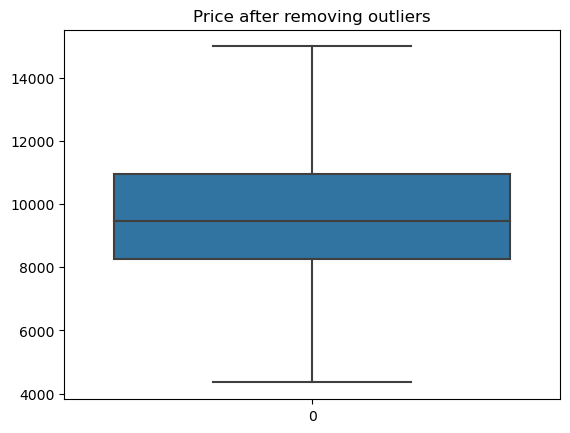

In [167]:
no_outliers(df3,'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

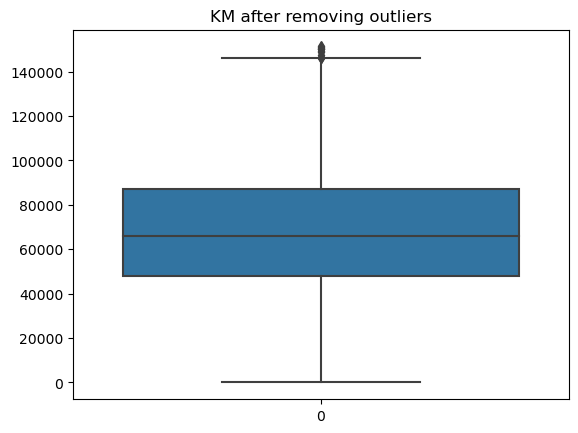

In [173]:
no_outliers(df3,'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

In [187]:
no_outliers(df3,'Age')


### Let's test our data in model and compare the R-squared with without imputation data model

In [189]:
final_model=sfa.ols(formula='Price~Age+KM+Weight',data=df3).fit()

In [190]:
# finding rsquare and adjusted rsquared values
final_model.rsquared,final_model.rsquared_adj

(0.6978619260197699, 0.6970905096606714)

### Predicting values from Model using same dataset

In [198]:
x = df3[['Age','KM','HP','CC','Doors','QT','Weight']]
y = df3[['Price']]

In [202]:
Predicted_price=final_model.predict(x)
Predicted_price

30      14319.468101
33      14210.085206
39      14203.781748
55      13118.913607
71      13236.493876
            ...     
1431     9410.830136
1432     9034.011961
1433     9165.299466
1434     9263.773434
1435    10101.767540
Length: 1179, dtype: float64

In [205]:
df3['Predicted_price']=Predicted_price

### new dataset with predicted price

In [206]:
df3

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price,Predicted_price
30,29,9750,97,1400,3,5,19,1100,12950,14319.468101
33,26,32692,97,1400,3,5,85,1100,14950,14210.085206
39,27,27500,97,1400,3,5,85,1100,14750,14203.781748
55,32,45725,110,1600,5,5,85,1075,13250,13118.913607
71,32,29198,97,1400,5,5,85,1060,12995,13236.493876
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500,9410.830136
1432,72,19000,86,1300,3,5,69,1015,10845,9034.011961
1433,71,17016,86,1300,3,5,69,1015,8500,9165.299466
1434,70,16916,86,1300,3,5,69,1015,7250,9263.773434
